<a href="https://colab.research.google.com/github/DanielRios1/bike-collisions-v/blob/main/ejercicio_visualizaci%C3%B3n_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de visualización de datos
Makeover Monday ofrece un reto semanal de recrear o mejorar visualizaciones de datos. ¡Tu tarea es elegir uno de las visualizaciones de datos para recrear o mejorar!

Para hacer esto:

Elegir un conjunto de datos de la Data Sets list. Puedes elegir un conjunto de datos reciente o uno del año anterior, ¡siempre y cuando te interese!
Descarga los datos que elegiste.
Usa Python para crear una visualización informativa y placentera a la vista usando los datos que seleccionaste.
También necesitas subir tu trabajo para esta tarea a GitHub, ¡así todos pueden ver lo fabulosa que es la visualización que creaste!

Para hacer esto:

Crea un nuevo repositorio de GitHub con un nombre informativo para su visualización o datos. (Nota: aquí hay instrucciones de cómo hacerlo si no estás segur. Asegúrate de marcar la casilla «Inicie este repositorio con un README.»).
Agrega tu código al repositorio GitHub que creaste. Puedes hacerlo en Google Colab seleccionando Archivo > «Guardar una Copia en GitHub».
Edita el README para crear un resumen informativo de los ejercicios que explican el propósito de la tarea/visualización, los datos y qué muestra/dice la visualización que creaste. ¡También podrías querer incluir una imagen estática de tu visualización final en el README! (Nota: los README son archivos markdown. Aquí hay una hoja con soluciones de markdown syntax.) ¡Intenta hacerlo lo más informativo y profesional posible, ya que esto es lo primero que las personas verán cuando entren a tu repositorio GitHub!
Una vez termines, envía un vínculo a tu repositorio GitHub para entregar esta tarea.

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

**Se abre la base de datos para comenzar a trabajar**

In [18]:
filename = "/content/BikeCollisions.xlsx"
df = pd.read_excel(filename)
df_copy= df
df.head()

,Accident Index,Date,Borough,Ward,Latitude,Longitude,Casualties,Severity,Url,Api Url,Number of Casualties,Number of Vehicles
0,2019010161545,2019-02-04 19:55:00,Hounslow,Heston Central,51.475300,-0.375342,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2
1,2019010191515,2019-07-04 15:09:00,Lambeth,Clapham Town,51.468211,-0.144234,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2
2,2019010209381,2019-10-03 17:05:00,Hillingdon,Northwood,51.612605,-0.434904,"Pedestrian,Cyclist",fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,2,1
3,2019010214996,2019-10-30 06:39:00,Lewisham,Rushey Green,51.444015,-0.026135,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2
4,2019010254652,2019-02-09 08:40:00,Camden,West Hampstead,51.550844,-0.191400,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61046 entries, 0 to 61045
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Accident Index        61046 non-null  object        
 1   Date                  61046 non-null  datetime64[ns]
 2   Borough               61046 non-null  object        
 3   Ward                  61046 non-null  object        
 4   Latitude              61046 non-null  float64       
 5   Longitude             61046 non-null  float64       
 6   Casualties            61046 non-null  object        
 7   Severity              61046 non-null  object        
 8   Url                   61046 non-null  object        
 9   Api Url               61046 non-null  object        
 10  Number of Casualties  61046 non-null  int64         
 11  Number of Vehicles    61046 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 5.6+ M

In [21]:
import datetime

In [27]:
df["Month"] = df["Date"].dt.month_name()
df

,Accident Index,Date,Borough,Ward,Latitude,Longitude,Casualties,Severity,Url,Api Url,Number of Casualties,Number of Vehicles,Month
0,2019010161545,2019-02-04 19:55:00,Hounslow,Heston Central,51.475300,-0.375342,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2,February
1,2019010191515,2019-07-04 15:09:00,Lambeth,Clapham Town,51.468211,-0.144234,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2,July
2,2019010209381,2019-10-03 17:05:00,Hillingdon,Northwood,51.612605,-0.434904,"Pedestrian,Cyclist",fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,2,1,October
3,2019010214996,2019-10-30 06:39:00,Lewisham,Rushey Green,51.444015,-0.026135,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2,October
4,2019010254652,2019-02-09 08:40:00,Camden,West Hampstead,51.550844,-0.191400,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,1,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61041,200501ZT80446,2005-10-25 07:10:00,Sutton,Carshalton South and Clockhouse,51.353677,-0.168791,Cyclist,slight,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2,October
61042,200501ZT80454,2005-10-22 13:30:00,Sutton,Nonsuch,51.371838,-0.226974,Cyclist,slight,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2,October
61043,200501ZT80461,2005-10-28 08:21:00,Sutton,Sutton Central,51.366800,-0.191540,Cyclist,slight,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2,October
61044,200501ZT80517,2005-12-08 08:15:00,Sutton,Carshalton Central,51.362091,-0.166300,Cyclist,slight,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2,December


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61046 entries, 0 to 61045
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Accident Index        61046 non-null  object        
 1   Date                  61046 non-null  datetime64[ns]
 2   Borough               61046 non-null  object        
 3   Ward                  61046 non-null  object        
 4   Latitude              61046 non-null  float64       
 5   Longitude             61046 non-null  float64       
 6   Casualties            61046 non-null  object        
 7   Severity              61046 non-null  object        
 8   Url                   61046 non-null  object        
 9   Api Url               61046 non-null  object        
 10  Number of Casualties  61046 non-null  int64         
 11  Number of Vehicles    61046 non-null  int64         
 12  Month                 61046 non-null  object        
dtypes: datetime64[ns

In [117]:
df["Month"].sort_values()

51535        April
8839         April
8840         April
12727        April
12728        April
           ...    
18274    September
38941    September
7949     September
7931     September
40237    September
Name: Month, Length: 61046, dtype: object

In [88]:
df["Severity"].value_counts()

slight     53050
serious     7792
fatal        204
Name: Severity, dtype: int64

In [89]:
filtro_fatal = df["Severity"] == "fatal"
filtro_serious = df["Severity"] == "serious"
filtro_slight = df["Severity"] == "slight"

df1 = df.loc[filtro_fatal]
df2 = df.loc[filtro_serious]
df3 = df.loc[filtro_slight]


In [92]:
df3["Severity"].value_counts()

slight    53050
Name: Severity, dtype: int64

In [105]:
grafico_fat = df1.groupby(["Month"])["Accident Index"].count()
grafico_ser = df2.groupby(["Month"])["Accident Index"].count()
grafico_slig = df3.groupby(["Month"])["Accident Index"].count()
grafico_slig

Month
April        4110
August       4830
December     2869
February     3063
January      3165
July         5943
June         5437
March        3928
May          5014
November     4357
October      5094
September    5240
Name: Accident Index, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


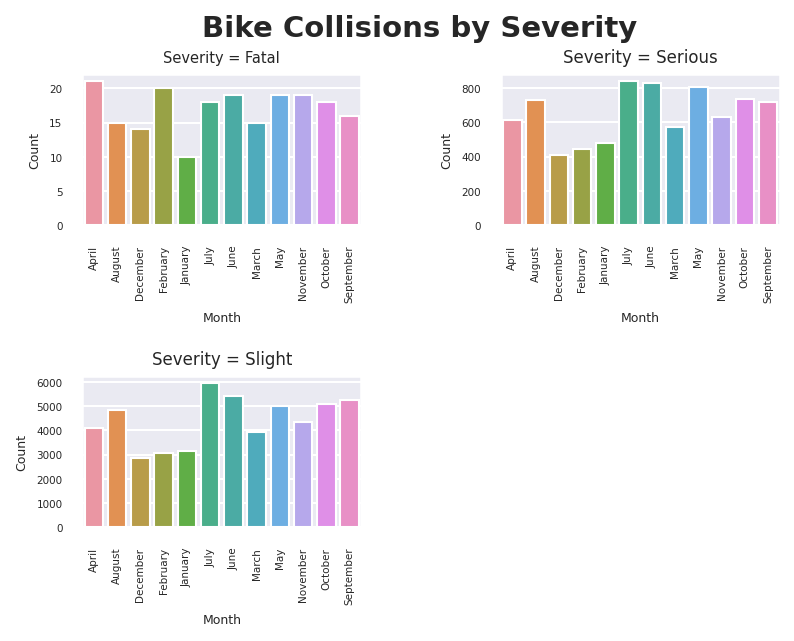

In [132]:
fig = plt.figure(dpi=150)
fig.suptitle("Bike Collisions by Severity", fontsize=14, fontweight="bold")
fig.subplots_adjust(hspace=1, wspace=0.5)

#fig1
ax = fig.add_subplot(2,2,1)
sns.barplot(grafico_fat.index, grafico_fat)
ax.set_title("Severity = Fatal", fontsize=7)
ax.set_xlabel("Month", fontsize=6)
ax.set_ylabel("Count", fontsize=6)
ax.tick_params(axis="x", labelsize=5, rotation=90)
ax.tick_params(axis="y", labelsize=5)


#fig2
ax2 = fig.add_subplot(2,2,2)
sns.barplot(grafico_ser.index, grafico_ser)
ax2.set_title("Severity = Serious", fontsize=8)
ax2.set_xlabel("Month", fontsize=6)
ax2.set_ylabel("Count", fontsize=6)
ax2.tick_params(axis="x", labelsize=5, rotation=90)
ax2.tick_params(axis="y", labelsize=5)

#fig3
ax3 = fig.add_subplot(2,2,3)
sns.barplot(grafico_slig.index, grafico_slig)
# sns.set(style="darkgrid")
ax3.set_title("Severity = Slight", fontsize=8)
ax3.set_xlabel("Month", fontsize=6)
ax3.set_ylabel("Count", fontsize=6)
ax3.tick_params(axis="x", labelsize=5, rotation=90)
ax3.tick_params(axis="y", labelsize=5)

plt.show()


In [ ]:
plt.figure(dpi=150)

plt.bar(df["Month"], height=1)
# plt.bar(df["Severity"].value_counts(), height=2, label="")
# plt.bar(df["Month"], df["Severity"], c="yellow", label="Outcome=0")
# plt.bar(df["Month"], df["Severity"], c="yellow", label="Outcome=0")
# plt.ylabel("")
# plt.xlabel("")
# plt.title("")

# plt.legend()
plt.show()

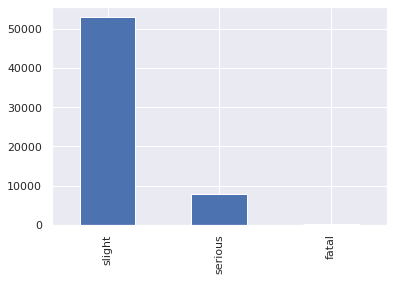

In [133]:
plot = df['Severity'].value_counts().plot(kind='bar')

In [82]:
df_dumm = pd.get_dummies(data = df, columns=["Severity"], drop_first=False)
df_dumm.head()

,Accident Index,Date,Borough,Ward,Latitude,Longitude,Casualties,Url,Api Url,Number of Casualties,Number of Vehicles,Month,Severity_fatal,Severity_serious,Severity_slight
0,2019010161545,2019-02-04 19:55:00,Hounslow,Heston Central,51.475300,-0.375342,Cyclist,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2,February,1,0,0
1,2019010191515,2019-07-04 15:09:00,Lambeth,Clapham Town,51.468211,-0.144234,Cyclist,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2,July,1,0,0
2,2019010209381,2019-10-03 17:05:00,Hillingdon,Northwood,51.612605,-0.434904,"Pedestrian,Cyclist",https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,2,1,October,1,0,0
3,2019010214996,2019-10-30 06:39:00,Lewisham,Rushey Green,51.444015,-0.026135,Cyclist,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2,October,1,0,0
4,2019010254652,2019-02-09 08:40:00,Camden,West Hampstead,51.550844,-0.191400,Cyclist,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,1,February,1,0,0


In [83]:
df_dumm = df_dumm[["Month", "Severity_fatal", "Severity_serious", "Severity_slight"]]
df_dumm.head()

,Month,Severity_fatal,Severity_serious,Severity_slight
0,February,1,0,0
1,July,1,0,0
2,October,1,0,0
3,October,1,0,0
4,February,1,0,0


In [85]:
filtro_sev = df_dumm.groupby(["Month"])[["Severity_fatal", "Severity_serious", "Severity_slight"]].sum()
filtro_sev

,Severity_fatal,Severity_serious,Severity_slight
Month,,,
April,21.0,612.0,4110.0
August,15.0,727.0,4830.0
December,14.0,409.0,2869.0
February,20.0,446.0,3063.0
January,10.0,480.0,3165.0
July,18.0,837.0,5943.0
June,19.0,826.0,5437.0
March,15.0,572.0,3928.0
May,19.0,805.0,5014.0


In [ ]:
filtro_sev.plot(kind = 'bar', figsize=(9,7))